In [1]:
import pandas
import matplotlib.pyplot as plt

CSV downloaded from https://musemonitor.com/misc/SampleCSV.zip

In [2]:
df = pandas.read_csv('museMonitor_2019-09-28--22-14-56_876838797.csv')

In [3]:
df.shape

(193, 39)

In [4]:
df.head().T

,0,1,2,3,4
TimeStamp,2019-09-28 22:14:56.603,2019-09-28 22:14:57.617,2019-09-28 22:14:58.640,2019-09-28 22:14:59.663,2019-09-28 22:15:00.810
Delta_TP9,0.997221,1.30834,1.4909,1.32904,NaN
Delta_AF7,0.844602,0.844602,0.844602,0.844602,NaN
Delta_AF8,-0.432137,-0.432137,-0.432137,-0.432137,NaN
Delta_TP10,0.153334,1.4109,1.20593,1.11402,NaN
Theta_TP9,1.08826,1.0708,0.934068,0.79693,NaN
Theta_AF7,0.242669,0.242669,0.242669,0.242669,NaN
Theta_AF8,-0.142907,-0.142907,-0.142907,-0.142907,NaN
Theta_TP10,0.647704,1.11555,0.825065,0.653504,NaN
Alpha_TP9,0.493391,1.28691,0.947504,0.840003,NaN


In [5]:
df.dtypes

TimeStamp           object
Delta_TP9          float64
Delta_AF7          float64
Delta_AF8          float64
Delta_TP10         float64
Theta_TP9          float64
Theta_AF7          float64
Theta_AF8          float64
Theta_TP10         float64
Alpha_TP9          float64
Alpha_AF7          float64
Alpha_AF8          float64
Alpha_TP10         float64
Beta_TP9           float64
Beta_AF7           float64
Beta_AF8           float64
Beta_TP10          float64
Gamma_TP9          float64
Gamma_AF7          float64
Gamma_AF8          float64
Gamma_TP10         float64
RAW_TP9            float64
RAW_AF7            float64
RAW_AF8            float64
RAW_TP10           float64
AUX_RIGHT          float64
Accelerometer_X    float64
Accelerometer_Y    float64
Accelerometer_Z    float64
Gyro_X             float64
Gyro_Y             float64
Gyro_Z             float64
HeadBandOn         float64
HSI_TP9            float64
HSI_AF7            float64
HSI_AF8            float64
HSI_TP10           float64
B

In [6]:
df['TimeStamp'][0]

'2019-09-28 22:14:56.603'

In [7]:
df['time']=pandas.to_datetime(df['TimeStamp'])

In [37]:
# https://matplotlib.org/3.1.1/api/markers_api.html
marker_dict={}
marker_dict['Alpha']='.'
marker_dict['Beta']='s'
marker_dict['Gamma']='*'
marker_dict['Delta']='^'

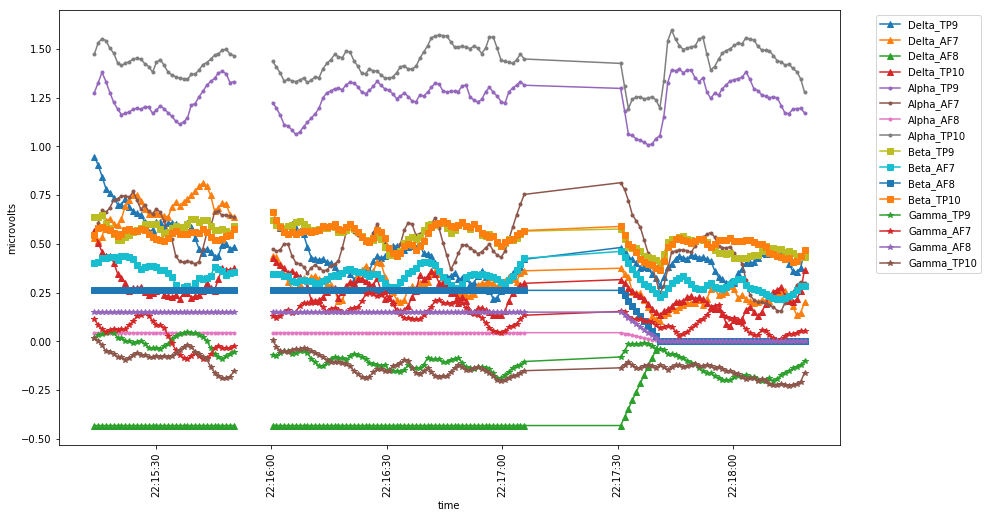

<Figure size 432x288 with 0 Axes>

In [56]:

for col_name,col_type in df.dtypes.iteritems():
    if col_type=='float64':
        #print(col_name.split('_'))
        if col_name.split('_')[0] in marker_dict.keys():
            #plt.plot(df['time'],df[col_name], marker=marker_dict[col_name.split('_')[0]],linestyle='None',markersize=5)
            plt.plot(df['time'],df[col_name].rolling(10).mean(), marker=marker_dict[col_name.split('_')[0]])
            
plt.xlabel('time')
plt.xticks(rotation='vertical')
plt.ylabel('microvolts')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left") # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132
fig = plt.gcf()
fig.set_size_inches(14,8)
plt.show()
plt.savefig('meditation.png') 